In [1]:
import pandas as pd                  # For data analysis          
import numpy as np                   # For mathematical calculations
import matplotlib.pyplot as plt      # For plotting graphs
from datetime import datetime        # To access datetime
from pandas import Series            # To work on series
%matplotlib inline                   
import warnings                      # To ignore the warnings
warnings.filterwarnings("ignore")    # To ignore all warnings

In [2]:
train=pd.read_csv("Time Series - Train Data.csv") # Read train data
test=pd.read_csv("Time Series - Test Data.csv")   # Read test data

In [3]:
train_original=train.copy()    # Create copy of train data
test_original=test.copy()      # Create copy of test data

In [4]:
train.columns, test.columns    # See features in dataset

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes, test.dtypes      # See datatypes of features

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape        # See shape of dataset 

((18288, 3), (5112, 2))

In [7]:
# Convert feature datatype from 'object' to 'Datetime' in test, train and test_original and train_original
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [8]:
# Extract hour, date, month & year from Datetime 
for i in (train, test, test_original, train_original):    
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [9]:
# Extract day of week
train['day of week']=train['Datetime'].dt.dayofweek       
temp = train['Datetime']

In [10]:
# Classify day of week to weekend (1) or not (0)
def applyer(row):                                         
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

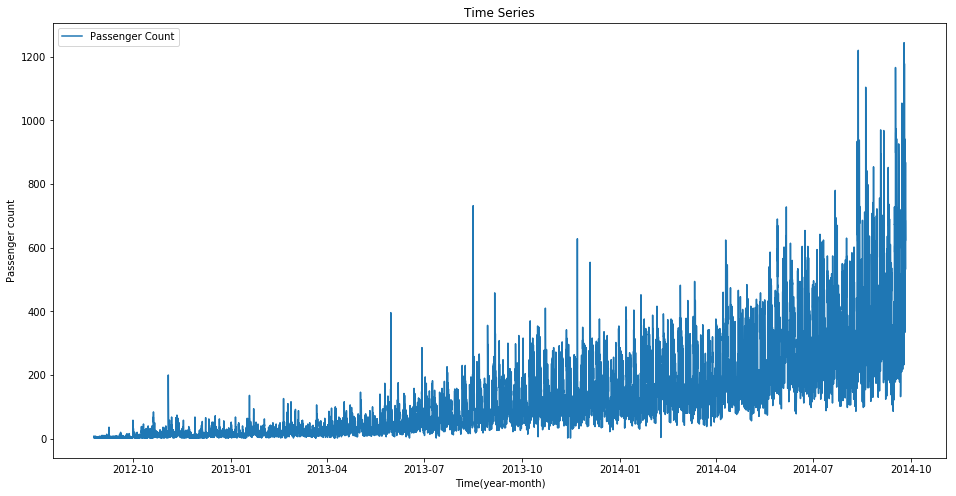

In [11]:
# A look at the time series 
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

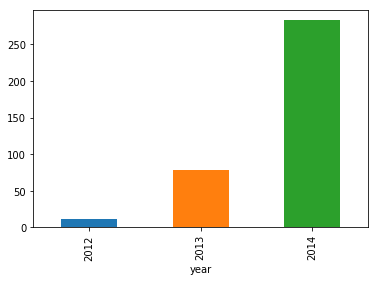

In [12]:
train.groupby('year')['Count'].mean().plot.bar()    # Plot the yearly passenger count

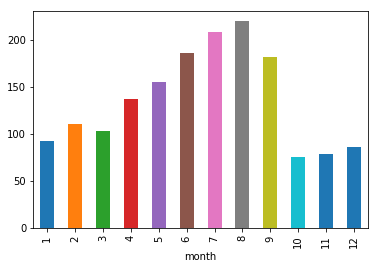

In [13]:
train.groupby('month')['Count'].mean().plot.bar()    # Plot the monthly mean of passenger count

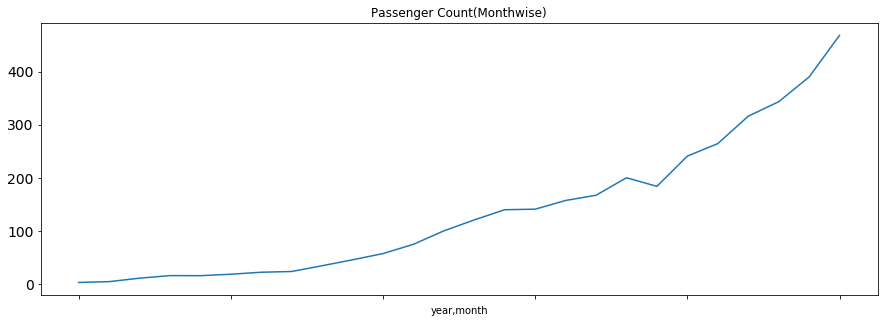

In [14]:
# Plot monthly mean of each year separately
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

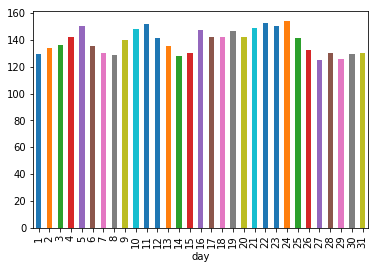

In [15]:
train.groupby('day')['Count'].mean().plot.bar()    # Plot daily mean of passenger count

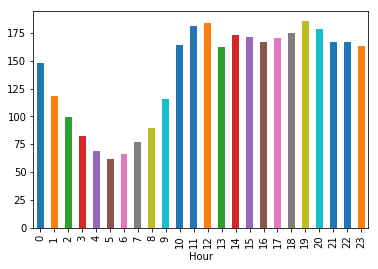

In [16]:
train.groupby('Hour')['Count'].mean().plot.bar()    # Plot hourly mean of passenger count

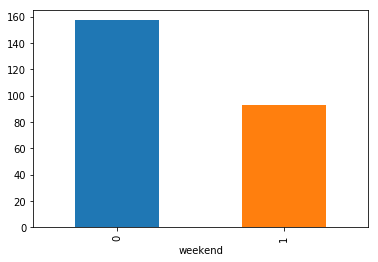

In [17]:
train.groupby('weekend')['Count'].mean().plot.bar()    # Plot weekend/non-weekend mean of passenger count

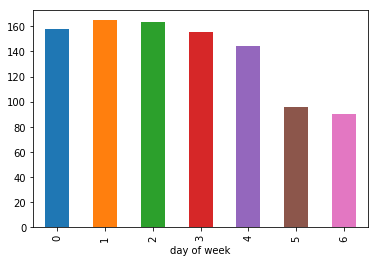

In [18]:
train.groupby('day of week')['Count'].mean().plot.bar()    # Plot  weekly day-wise mean of passenger count (0-Monday,6-Sunday)

In [19]:
train=train.drop('ID',1)    # Drop the ID variable as it has nothing to do with the passenger count

In [20]:
# Aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise, increase stability and ease of modeling
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

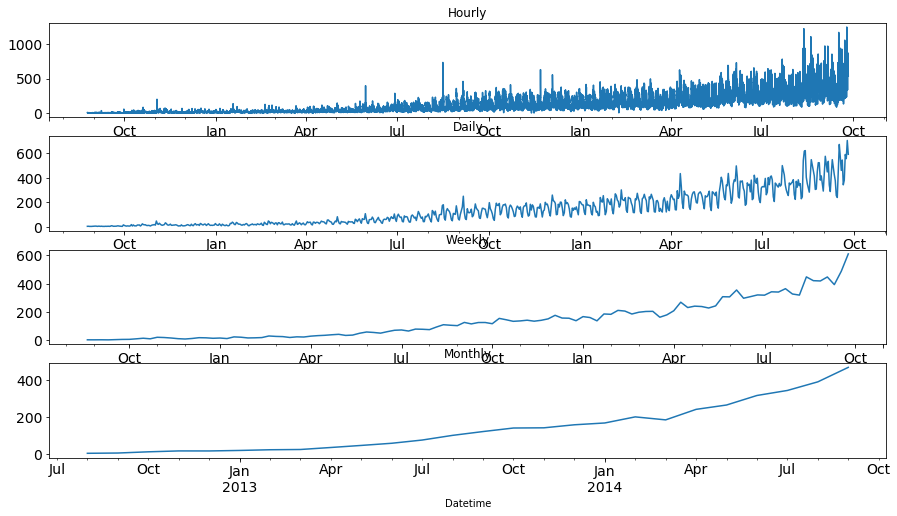

In [21]:
# Plot hourly, daily, weekly and monthly series
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [22]:
# Aggregating test data to daily time series
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

# Aggregating train data to daily time series
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [23]:
# Labeling the datapoints as training and validation datasets
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

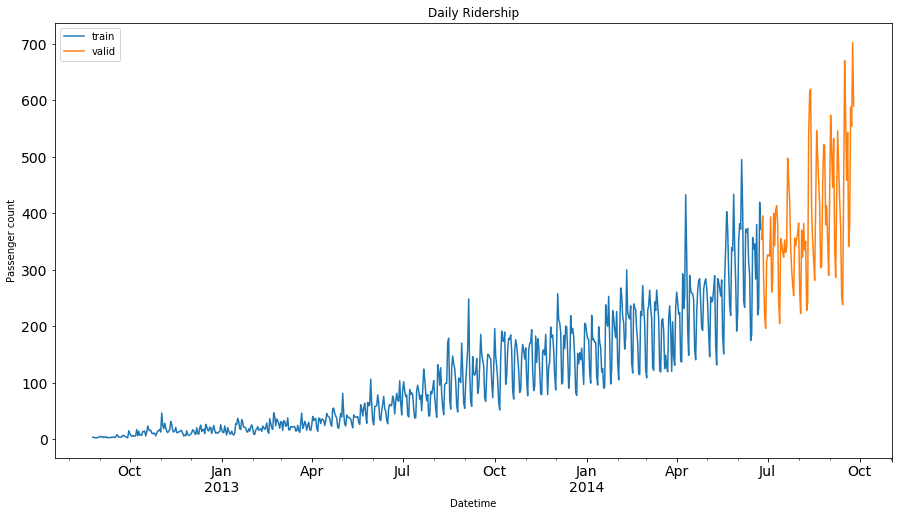

In [24]:
# Plot train & validate datasets
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()